<div style="text-align: right;font-weight:bold;font-size:large">Till Pfaff<br>3789265</div>

Full code available at https://github.com/till-robert/cs1_seminar/tree/main/task17


### 17. Analysis of autocorrelations
Write a computer program for the analysis of autocorrelations (autocorrelation function, exponential autocorrelation time, integrated autocorrelation time). Test your analysis program by comparison with the
exact results of the synthetic bivariate Gaussian time series. Set the
(exponential) autocorrelation time to $\tau_{\mathrm{exp}} = 10$ respectively $\tau_{\mathrm{exp}} = 50.$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def gen_bivariate(tau,k):
    rho = np.exp(-1/tau)
    e = np.zeros(k)
    e[0] = np.random.normal()
    for i in range(1,k):
        e[i] = rho*e[i-1] + np.sqrt(1-rho**2)*np.random.normal()
    return e
def ACF(series,N_max):
    ACF_list = np.zeros(N_max)
    N = len(series)
    for k in range(N_max):
        sum = 0
        for i in range(N-k):
            sum += series[i]*series[i+k]
        ACF_list[k] = 1/(N-k) * sum

    
    return ACF_list

In [3]:
series10 = gen_bivariate(10,10000)
series50 = gen_bivariate(50,10000)

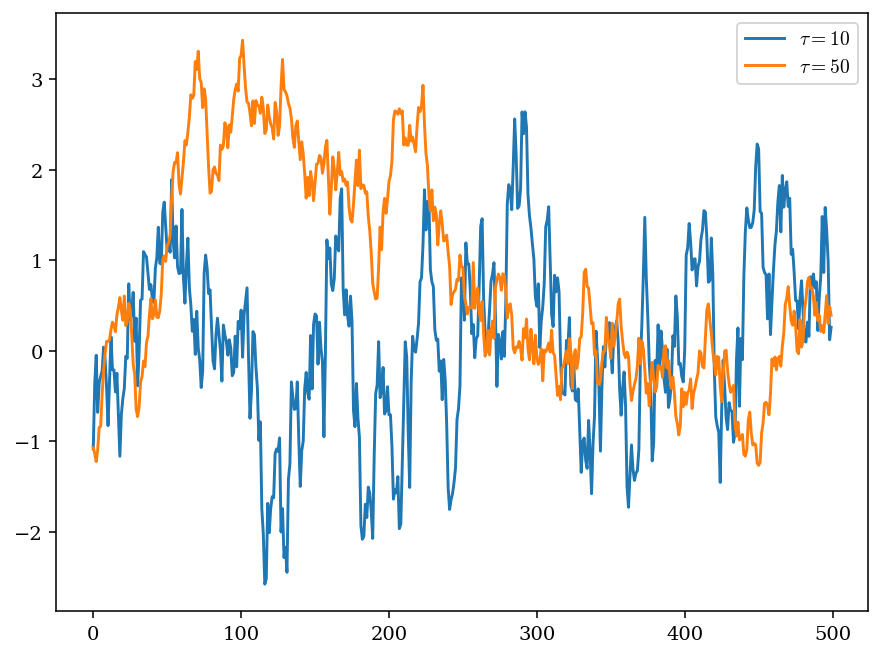

In [11]:
plt.plot(np.arange(500),series10[:500], label=r"$\tau=10$")
plt.plot(np.arange(500),series50[:500], label=r"$\tau=50$")

plt.legend()
plt.show()

In [5]:
acf_series10 = ACF(series10,200)
acf_series50 = ACF(series50,200)

In [6]:
def rho_fit(k,rho):
    return rho**k

params10, _ = curve_fit(rho_fit,np.arange(200),acf_series10)
params50, _ = curve_fit(rho_fit,np.arange(200),acf_series50)


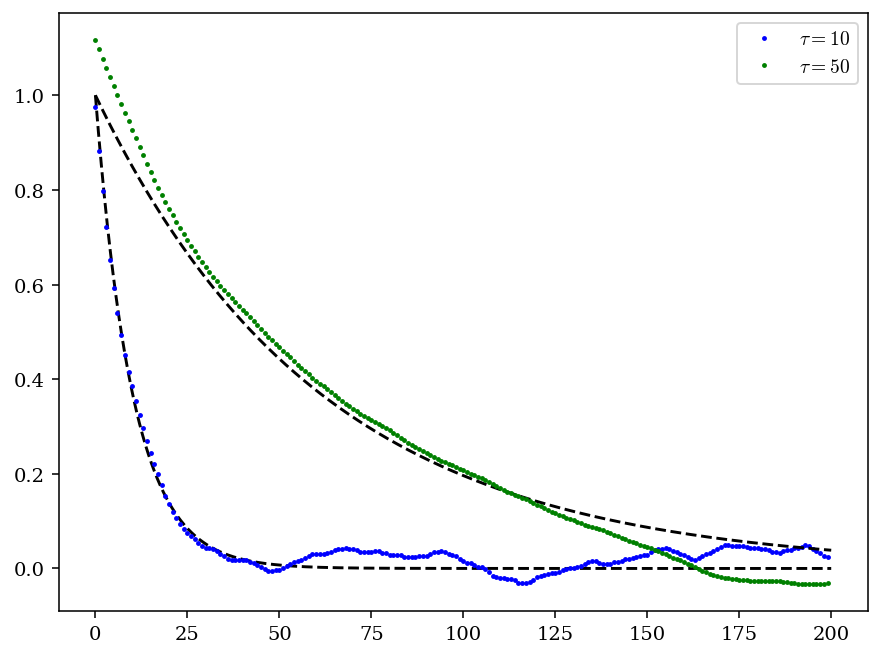

In [7]:
x = np.linspace(0,200,1000)

plt.plot(x,rho_fit(x,*params10),"k--")
plt.plot(np.arange(200),acf_series10,"b.",ms=3,label=r"$\tau=10$")
plt.plot(x,rho_fit(x,*params50),"k--")
plt.plot(np.arange(200),acf_series50,"g.",ms=3,label=r"$\tau=50$")

tau_exp10 = -1/np.log(params10[0])
tau_exp50 = -1/np.log(params50[0])

plt.legend()
plt.show()

In [8]:
print(f"tau_exp:")
print(f"tau_expected = 10, tau_numeric = {tau_exp10:.3f}")
print(f"tau_expected = 50, tau_numeric = {tau_exp50:.3f}")

#tau_int_expected = lambda tau,k_max: -1/np.log(np.exp(-1/tau)) LOL
tau_int_numeric = lambda acf,k_max: 1/2 + np.sum(acf[:k_max])

#tau_int10_expected = tau_int_expected(10,200)
tau_int10_numeric = tau_int_numeric(acf_series10,200)

#tau_int50_expected = tau_int_expected(50,200)
tau_int50_numeric =  tau_int_numeric(acf_series50,200)

print(f"\ntau_int:")
print(f"tau_expected = 10, tau_numeric = {tau_int10_numeric:.3f}")
print(f"tau_expected = 50, tau_numeric = {tau_int50_numeric:.3f}")

tau_exp:
tau_expected = 10, tau_numeric = 10.129
tau_expected = 50, tau_numeric = 61.409

tau_int:
tau_expected = 10, tau_numeric = 14.103
tau_expected = 50, tau_numeric = 59.107
